In [93]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
import re

In [94]:
dt = pd.read_csv('data_results/DecisionTree.csv')
svc = pd.read_csv('data_results/LinearSVC.csv')
lr = pd.read_csv('data_results/LogisticRegression.csv')
mlp = pd.read_csv('data_results/MLP.csv')
nb = pd.read_csv('data_results/MultiNB.csv')
rf = pd.read_csv('data_results/RandomForest.csv')

In [95]:
columns = ['model', 'vect__max_features','train_accuracy_score_mean', 'valid_accuracy_score_mean']
results = [dt, svc, lr, mlp, nb, rf]

for index in range(len(results)):
    results[index].model = results[index].model.apply(lambda text: re.sub(r'\([^)]*\)', '', text.lower()).replace('classifier',''))

In [96]:
df = pd.DataFrame({}, columns=columns)

for res in results:
    df = df.append(res[columns])


In [97]:
df

,model,vect__max_features,train_accuracy_score_mean,valid_accuracy_score_mean
0,decisiontree,64000,0.786031,0.732475
1,decisiontree,32000,0.785000,0.732300
2,decisiontree,16000,0.786019,0.733250
3,decisiontree,8000,0.785644,0.733375
4,decisiontree,4000,0.787963,0.735650
5,decisiontree,2000,0.787806,0.733950
6,decisiontree,1000,0.789037,0.733825
7,decisiontree,500,0.789269,0.734150
0,linearsvc,64000,0.985331,0.890525
1,linearsvc,32000,0.981363,0.889950


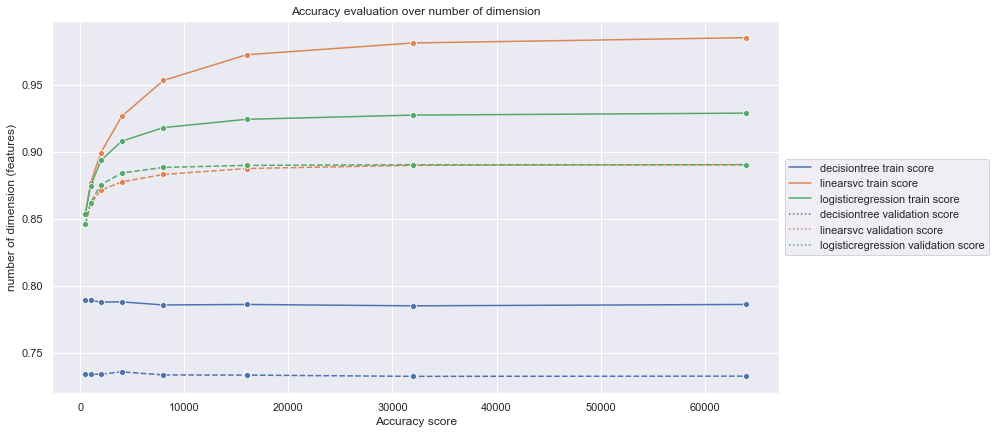

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

unique = df['model'].unique()[:3]

palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

ax1 = sns.lineplot(data=df[df['model'].isin(unique)], x='vect__max_features', y='train_accuracy_score_mean', hue='model', marker="o", palette=palette)

ax2 = sns.lineplot(data=df[df['model'].isin(unique)], x='vect__max_features', y='valid_accuracy_score_mean', hue='model', marker="o", linestyle="dashed", palette=palette)

leg = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
leg_lines = leg.get_lines()
for index in range(len(leg_lines)):

    if index > 2:
        leg_lines[index].set_linestyle(":")
        leg.get_texts()[index].set_text(leg.get_texts()[index].get_text() + ' validation score')

    else:
        leg.get_texts()[index].set_text(leg.get_texts()[index].get_text() + ' train score')



plt.tight_layout()
plt.title('Accuracy evaluation over number of dimension')
plt.xlabel('Accuracy score')
plt.ylabel('number of dimension (features)')
plt.savefig('imgs/firstpart.png')
plt.show()

- decision tree :
    - Les 2 courbes augmentent à la même allure sans creuser d'écart jusqu'à 4000 dim où la courbe train continue d'augmenter alors que la courbe de valididation décroit doucement.
    - On va donc prendre 4000.

- regression logistique :
    - Au début (500 dim), il y a un très faible écart entre les courbes train/valide, puis l'écart augmente jusqu'à 16000 dim puis l'écart de change plus. 
    - Les courbes accuracy continuent d'augmenter (en accuracy) mais l'écart ne se creuse pas.
    - On va prendre : le maximum car, l'écart ne semblent pas se creuser mais les courbent continue d'augmenter.

-  SVC :
    - l'écart est faible avec seulement 500 dim puis l'écart se creuse jusqu'à ce que le train sature à 1 et le valid à moins de 0.9 passé 4000.
    - On va prendre : 4000 


- decision tree :
    - The 2 curves increase at the same rate without widening the gap until 4000 dim where the train curve continues to increase while the validation curve slowly decreases.
    - We will therefore take 4000.

- logistic regression :
    - At the beginning (500 dim), there is a very small gap between the train and validation curves, then the gap increases until 16000 dim then the gap does not change anymore. 
    - The accuracy curves continue to increase (in accuracy) but the gap does not widen.
    - We will take: the maximum because, the gap does not seem to increase but the curves continues to increase.

- SVC:
    - the gap is small with only 500 dim then the gap widens until the train saturates at 1 and the valid at less than 0.9 past 4000.
    - We will take : 4000 




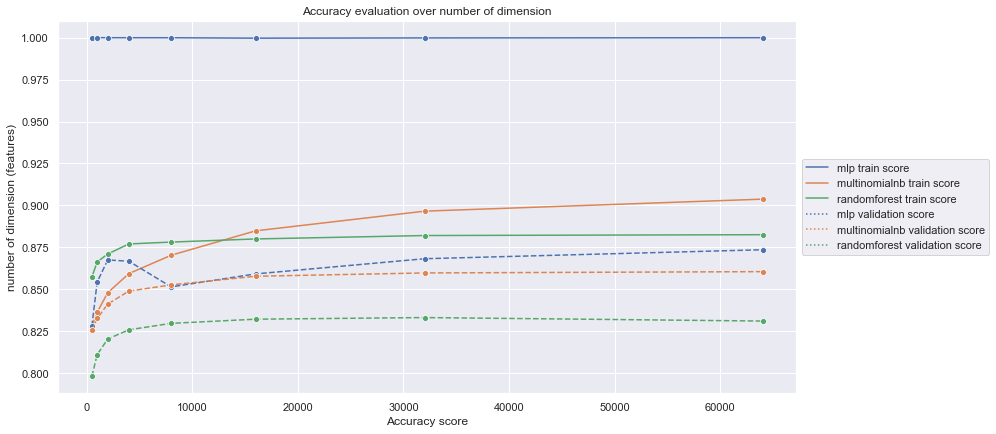

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

unique = df['model'].unique()[3:]

palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

ax1 = sns.lineplot(data=df[df['model'].isin(unique)], x='vect__max_features', y='train_accuracy_score_mean', hue='model', marker="o", palette=palette)

ax2 = sns.lineplot(data=df[df['model'].isin(unique)], x='vect__max_features', y='valid_accuracy_score_mean', hue='model', marker="o", linestyle="dashed", palette=palette)

leg = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
leg_lines = leg.get_lines()
for index in range(len(leg_lines)):

    if index > 2:
        leg_lines[index].set_linestyle(":")
        leg.get_texts()[index].set_text(leg.get_texts()[index].get_text() + ' validation score')

    else:
        leg.get_texts()[index].set_text(leg.get_texts()[index].get_text() + ' train score')




plt.tight_layout()
plt.title('Accuracy evaluation over number of dimension')
plt.xlabel('Accuracy score')
plt.ylabel('number of dimension (features)')
plt.show()

- MLP : 
    - On remarque que la courbe train sature à 1 (pour n'importe quelle  nombre de dimension), il faut trouver un autre moyen de réduire cela. Quant à la courbe de validation, on remarque qu'il y a un pic intéressant à 1000. Puis cela descend et réaugmente progressivement.
    - On va prendre le maximum pour l'instant.
 
- multiNB :
    - l'écart est très faible au début puis augmente progressivement. Cependant, l'écart n'est pas excessivement important à la fin. Les courbes continuent d'augmenter.
    - On va prendre le maximum.

- Random Forest : 
    -l'écart ne se creuse pas et les courbes augmente jusqu'à 32 000 dim puis la validation décroit.
    - on va donc prendre 32 000.


- MLP: 
    - We notice that the train curve saturates at 1 (for any number of dimensions), we need to find another way to reduce this. As for the validation curve, we notice that there is an interesting peak at 1000. Then it goes down and gradually increases again.
    - We'll take the maximum for now.
 
- multiNB:
    - The gap is very small at the beginning and then gradually increases. However, the gap is not excessively large at the end. The curves continue to increase.
    - We will take the maximum.

- Random Forest: 
    -the gap does not widen and the curves increase until 32 000 dim then the validation decreases.
    - We will therefore take 32 000.
